In [1]:
!pip install matplotlib --quiet
!pip install pandas --quiet
!pip install scipy --quiet
!pip install statsmodels --quiet

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

import warnings,scipy,statsmodels
warnings.filterwarnings("ignore")

plt.rcParams["figure.figsize"]=16,3

In [3]:
file = "https://raw.githubusercontent.com/FuTSA23/time-series-analysis-datasets/main/nyc_taxi.csv"
nyc_taxi=pd.read_csv(file,index_col="timestamp",parse_dates=True)
nyc_taxi

,value
timestamp,
2014-07-01 00:00:00,10844
2014-07-01 00:30:00,8127
2014-07-01 01:00:00,6210
2014-07-01 01:30:00,4656
2014-07-01 02:00:00,3820
...,...
2015-01-31 21:30:00,24670
2015-01-31 22:00:00,25721
2015-01-31 22:30:00,27309


In [4]:
nyc_taxi.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10320 entries, 2014-07-01 00:00:00 to 2015-01-31 23:30:00
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   value   10320 non-null  int64
dtypes: int64(1)
memory usage: 161.2 KB


In [5]:
nyc_taxi.index.freq = '30T'


In [6]:
nyc_taxi

,value
timestamp,
2014-07-01 00:00:00,10844
2014-07-01 00:30:00,8127
2014-07-01 01:00:00,6210
2014-07-01 01:30:00,4656
2014-07-01 02:00:00,3820
...,...
2015-01-31 21:30:00,24670
2015-01-31 22:00:00,25721
2015-01-31 22:30:00,27309


In [7]:
# The data contains known anomalies that are provided to evaluate the performance of our outlier detectors
nyc_dates =  [
        "2014-11-01",
        "2014-11-27",
        "2014-12-25",
        "2015-01-01",
        "2015-01-27"
]

<Axes: title={'center': 'NYC Taxi'}, xlabel='timestamp'>

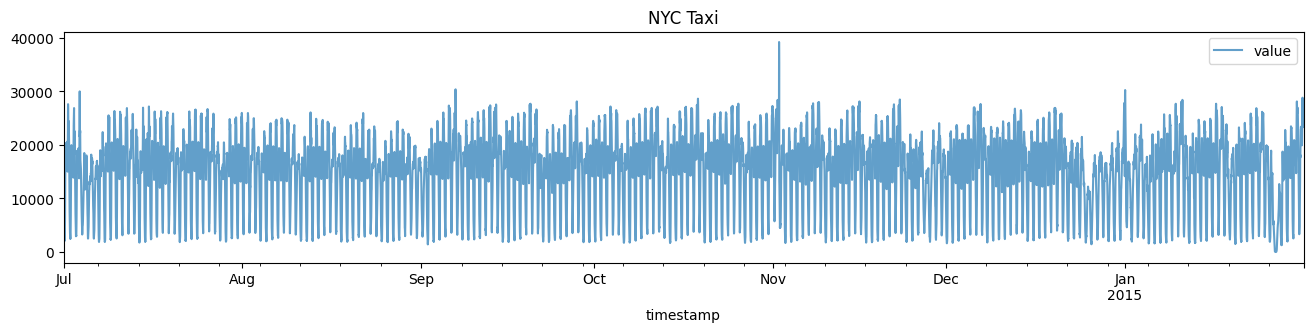

In [8]:
nyc_taxi.plot(title="NYC Taxi", alpha=0.7)

In [9]:
pip install seaborn --quiet

Note: you may need to restart the kernel to use updated packages.


In [10]:
import seaborn as sns
sns.__version__

'0.12.2'

In [11]:
nyc_taxi.head()

,value
timestamp,
2014-07-01 00:00:00,10844
2014-07-01 00:30:00,8127
2014-07-01 01:00:00,6210
2014-07-01 01:30:00,4656
2014-07-01 02:00:00,3820


In [13]:
nyc_down=nyc_taxi.resample("D").mean()
nyc_down

,value
timestamp,
2014-07-01,15540.979167
2014-07-02,15284.166667
2014-07-03,14794.625000
2014-07-04,11511.770833
2014-07-05,11572.291667
...,...
2015-01-27,4834.541667
2015-01-28,12947.562500
2015-01-29,14686.145833


In [14]:
print("Downsampled Frequency : {}".format(nyc_down.index.freq))
print("No. of records after downsamplings : {}".format((nyc_down.shape)[0]))

Downsampled Frequency : <Day>
No. of records after downsamplings : 215


In [16]:
known_outliers = nyc_down.loc[nyc_dates]
known_outliers

,value
timestamp,
2014-11-01,20553.500000
2014-11-27,10899.666667
2014-12-25,7902.125000
2015-01-01,14383.479167
2015-01-27,4834.541667


## histogram

<Axes: ylabel='Count'>

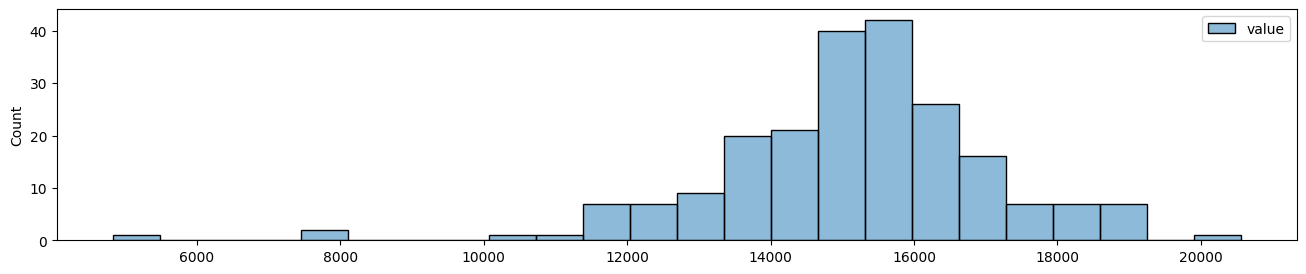

In [18]:
tx=nyc_taxi.resample("D").mean()
sns.histplot(tx)

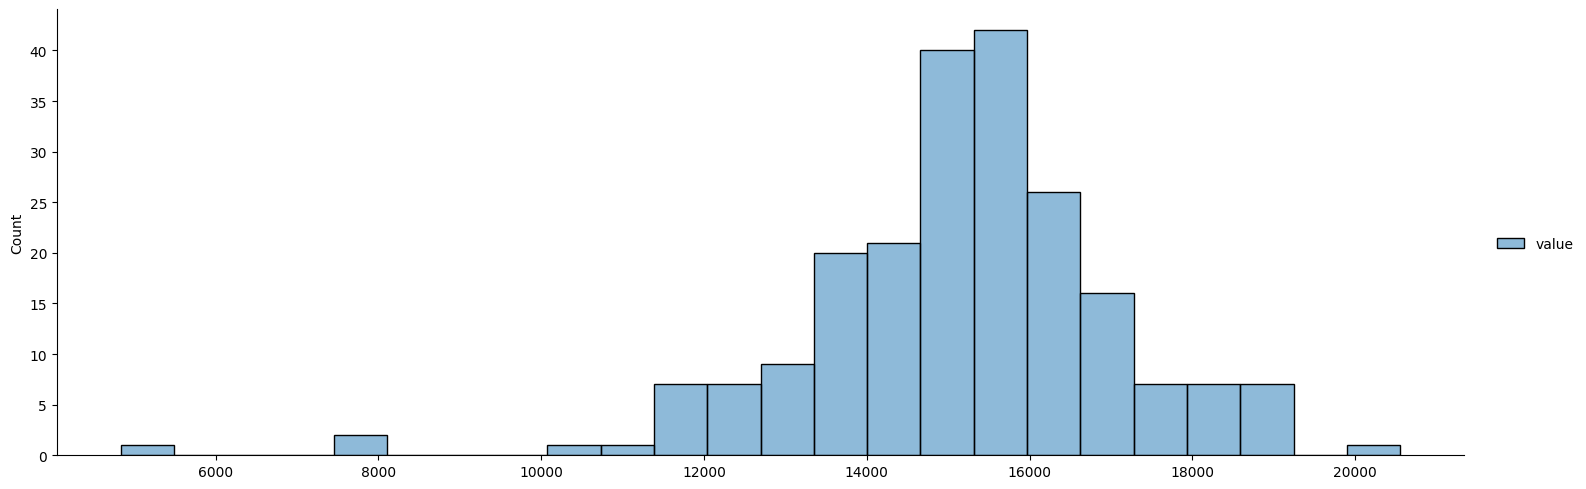

In [23]:
# Similar plot can be achieved by displot()
sns.displot(tx,kind='hist',aspect=3)

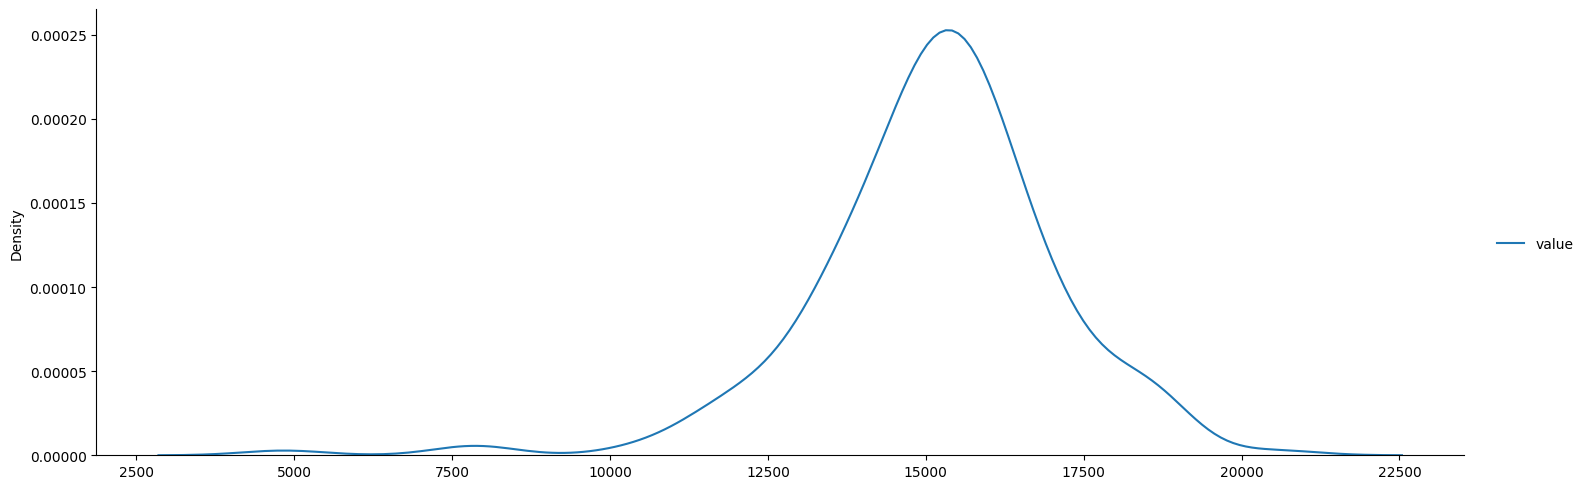

In [24]:
sns.displot(tx,kind='kde',aspect=3)

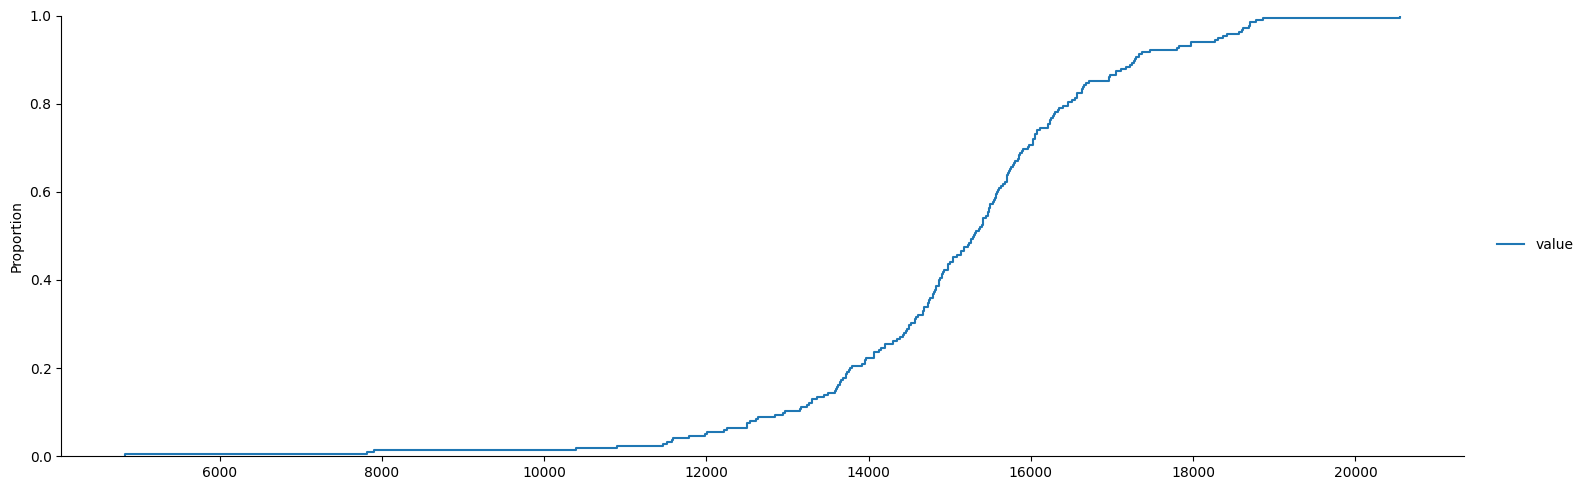

In [25]:
sns.displot(tx,kind='ecdf',aspect=3)

## box plot

<Axes: xlabel='value'>

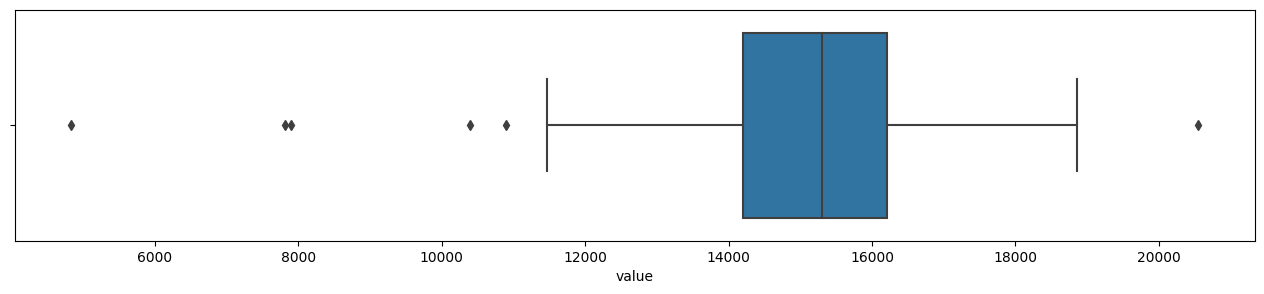

In [33]:
sns.boxplot(x=tx['value'], whis=1.5)

<Axes: xlabel='value'>

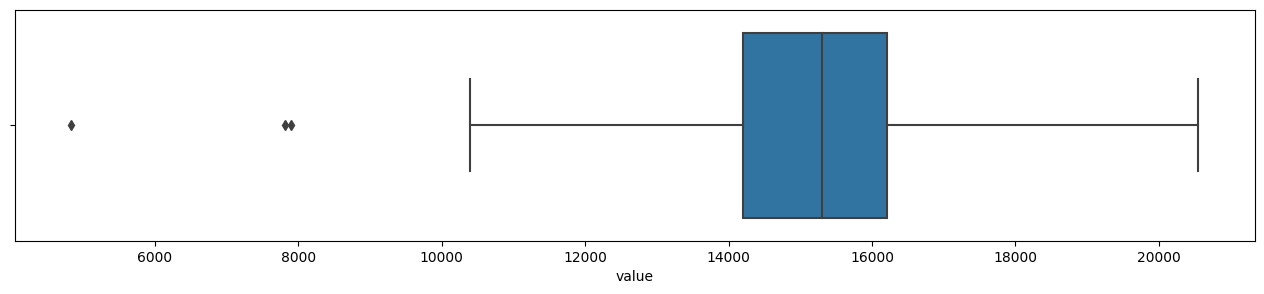

In [35]:
sns.boxplot(x=tx['value'],whis=2.5)

## boxenplot(Letter value plot)

<Axes: >

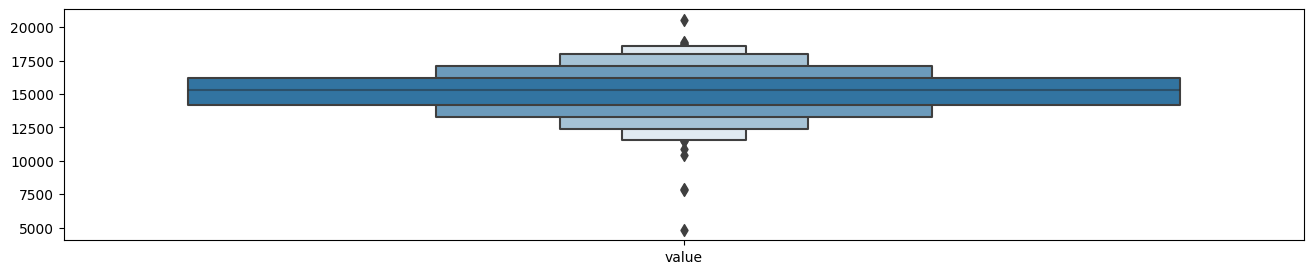

In [36]:
sns.boxenplot(tx)

<Axes: xlabel='value'>

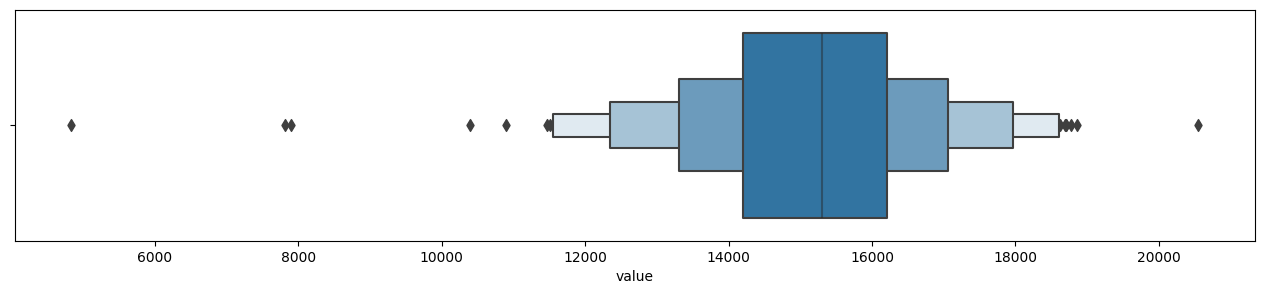

In [37]:
sns.boxenplot(x=tx['value'])

<Axes: xlabel='value'>

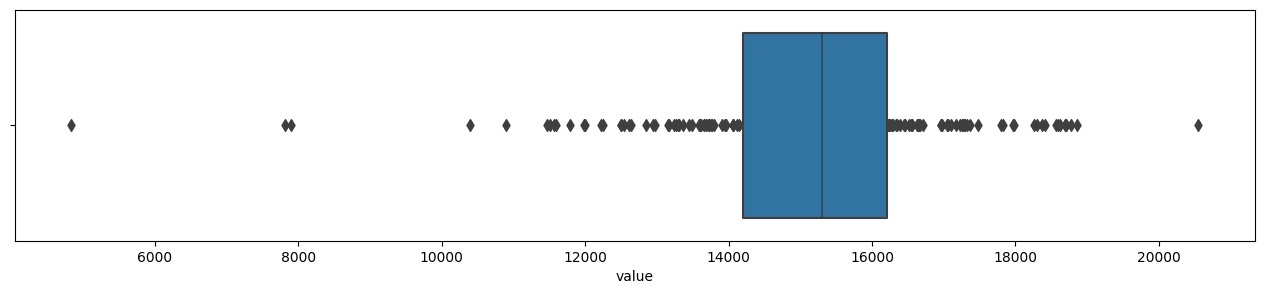

In [43]:
sns.boxenplot(x=tx['value'],k_depth=1)

<Axes: xlabel='value'>

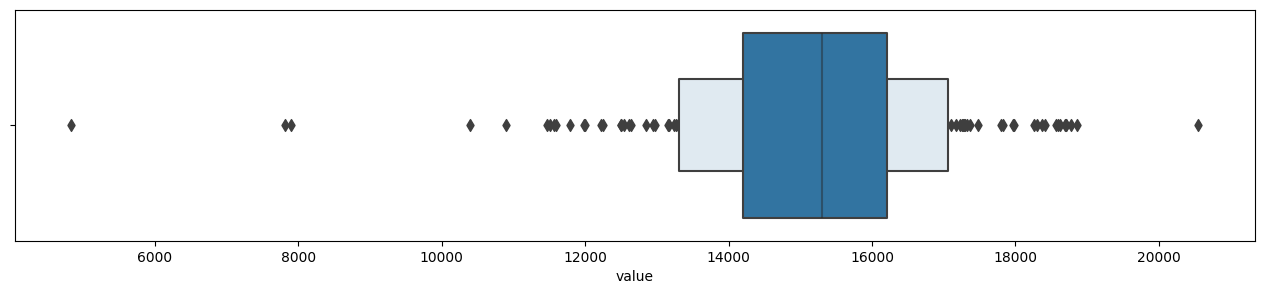

In [39]:
sns.boxenplot(x=tx['value'],k_depth=2)

<Axes: xlabel='value'>

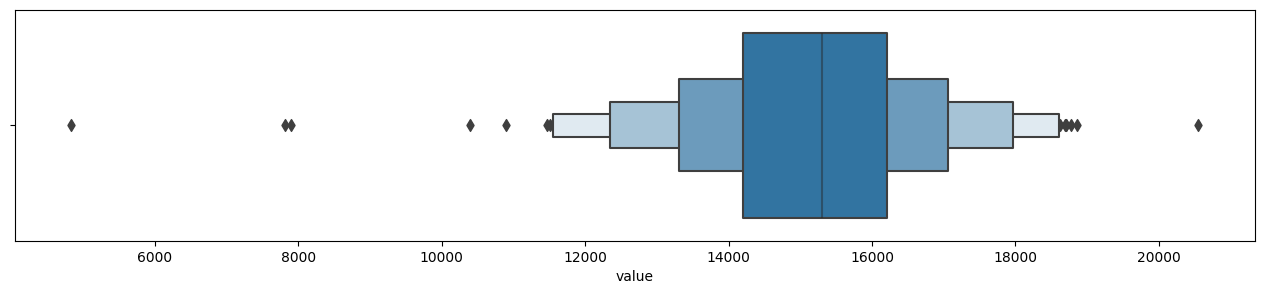

In [41]:
sns.boxenplot(x=tx['value'],k_depth=4)

<Axes: xlabel='value'>

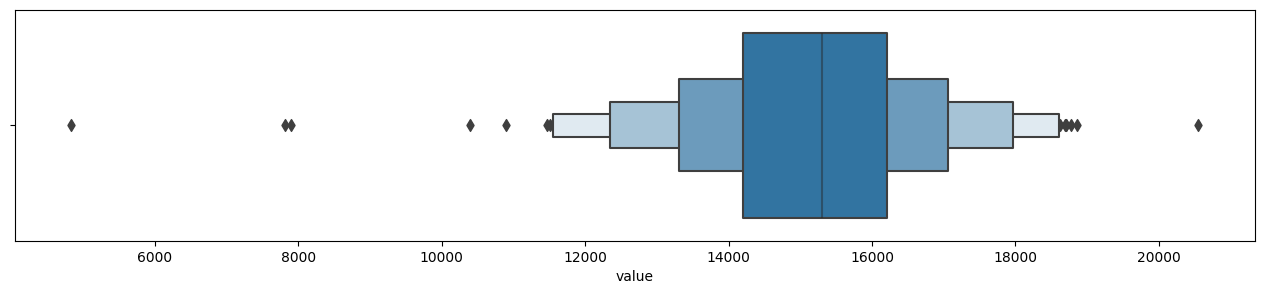

In [44]:
# tukey method
# default,k_depth='tukey' or k_depth=4
sns.boxenplot(x=tx['value'],k_depth='tukey')

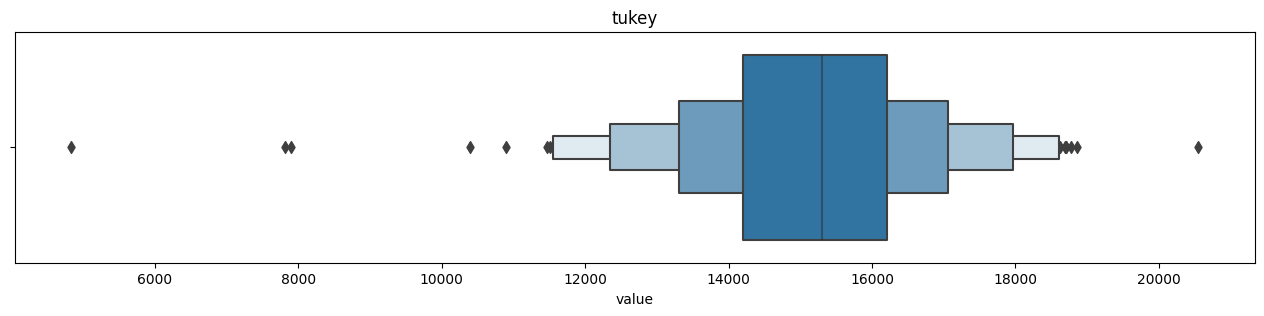

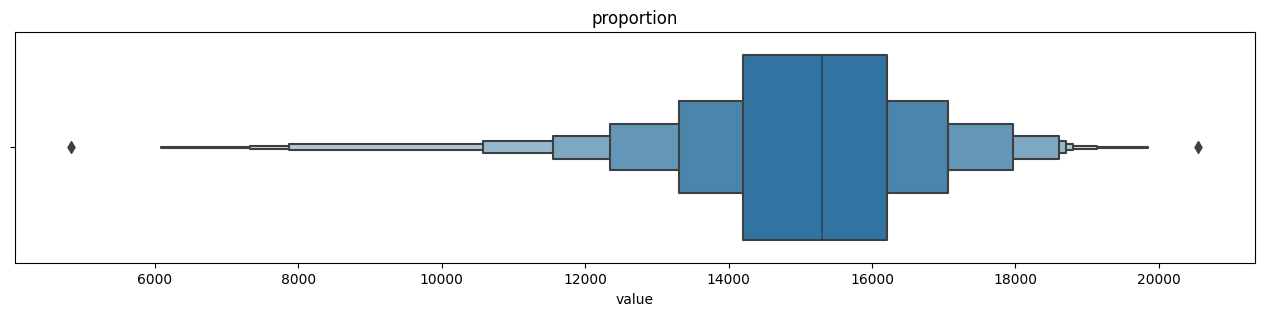

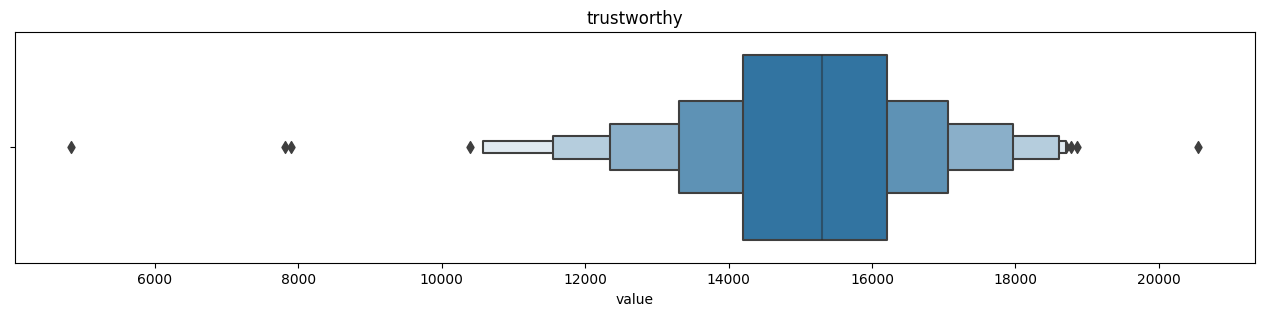

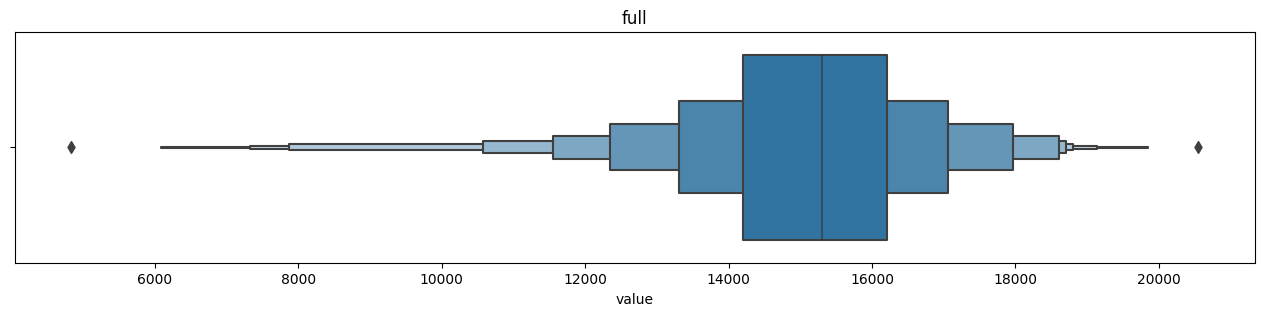

In [49]:
# different methods

for i in ['tukey','proportion','trustworthy','full']:
    sns.boxenplot(x=tx['value'],k_depth=i)
    plt.title(i)
    plt.show()

## violin plot

<Axes: xlabel='value'>

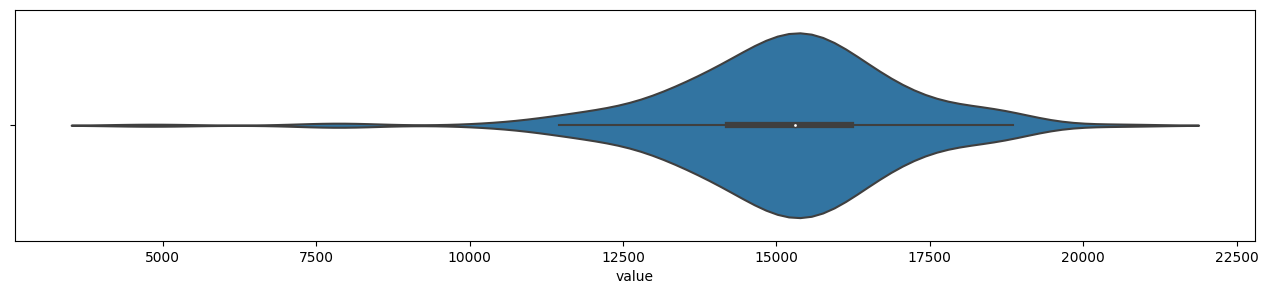

In [53]:
sns.violinplot(x=tx['value'])

<Axes: xlabel='value'>

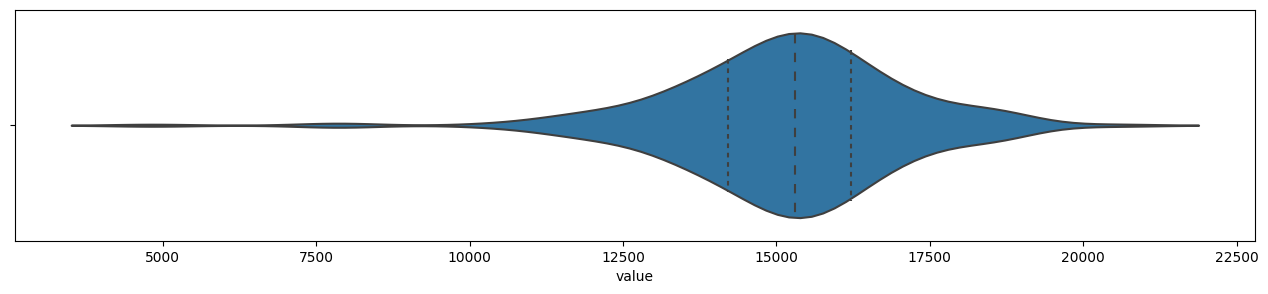

In [54]:
sns.violinplot(x=tx['value'],inner='quartile')

# lag plot

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

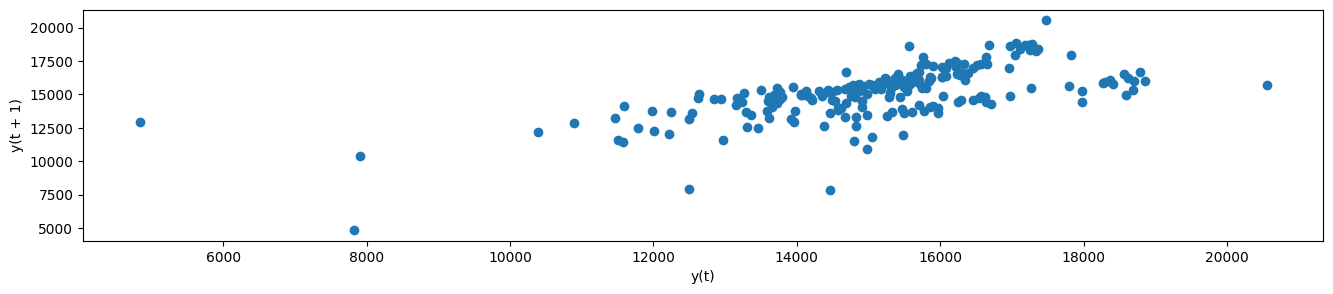

In [57]:
from pandas.plotting import lag_plot
lag_plot(tx)

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

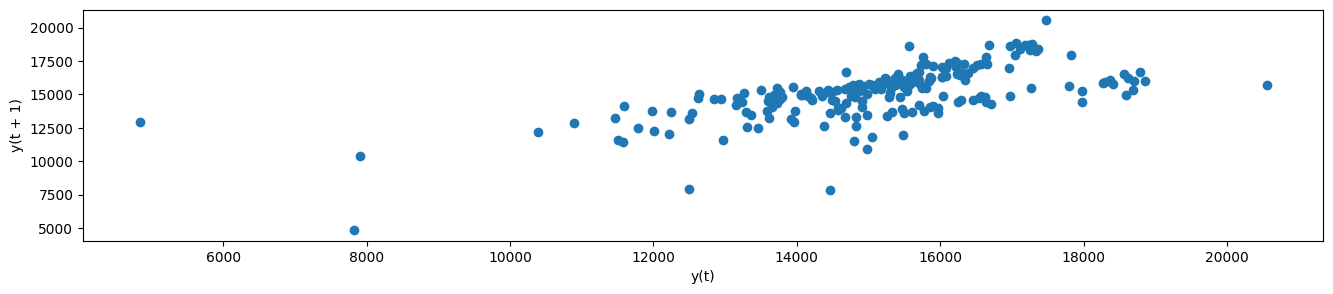

In [61]:
lag_plot(tx,lag=1)

## lag plot using seaborn.scatterplot

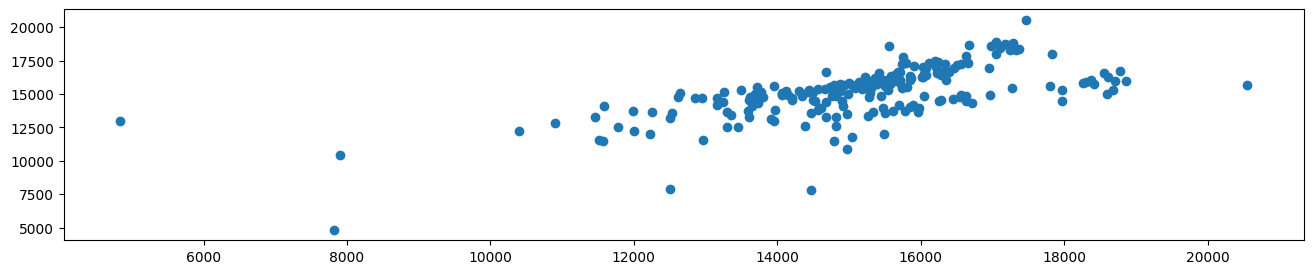

In [91]:
# using matplot
y=tx[1:].values.reshape(-1)
x=tx[:-1].values.reshape(-1)
plt.scatter(x,y)

<Axes: >

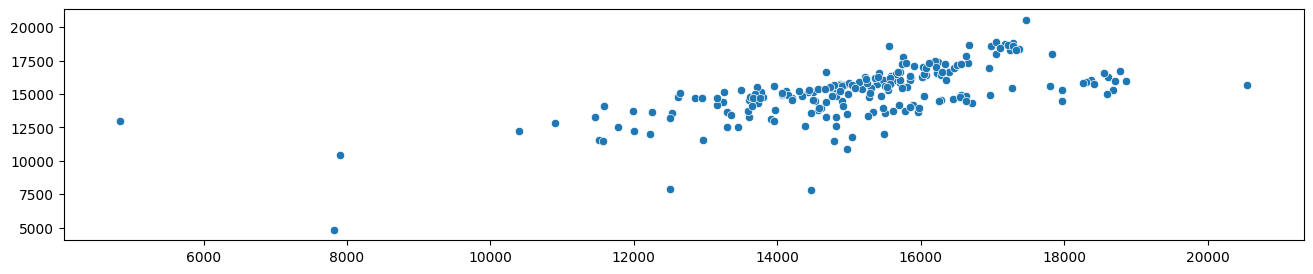

In [93]:
y=tx[1:].values.reshape(-1)
x=tx[:-1].values.reshape(-1)
sns.scatterplot(x=x,y=y)

In [96]:
percentiles=[0,0.05,0.1,0.25,0.45,0.5,0.6,0.75,0.85,1]
tx.describe(percentiles=percentiles)

,value
count,215.000000
mean,15137.569380
std,1937.391020
min,4834.541667
0%,4834.541667
5%,11998.181250
10%,13043.854167
25%,14205.197917
45%,15056.462500
50%,15299.937500


In [98]:
percentiles=[0,5,10,25,45,50,60,75,85,100]
np.percentile(tx,percentiles)

array([ 4834.54166667, 11998.18125   , 13043.85416667, 14205.19791667,
       15056.4625    , 15299.9375    , 15587.23333333, 16209.42708333,
       16708.5375    , 20553.5       ])

In [105]:
def iqr_outliers(data):# inter quartile range
    q1,q3=np.percentile(data,[25,75])
    IQR=q3-q1
    lower_fence=q1-(1.5*IQR)
    upper_fence=q3+(1.5*IQR)
    return data[(data.value<lower_fence) | (data.value>upper_fence)]

In [107]:
estimated_outliers=iqr_outliers(tx)
estimated_outliers

,value
timestamp,
2014-11-01,20553.500000
2014-11-27,10899.666667
2014-12-25,7902.125000
2014-12-26,10397.958333
2015-01-26,7818.979167
2015-01-27,4834.541667


In [108]:
def plot_outliers(outliers, data, method='KNN',
                 halignment = 'right', 
                 valignment = 'bottom',
                 labels=False):

    ax = data.plot(alpha=0.6)
    
    if labels:
        for i in outliers['value'].items():
            plt.plot(i[0], i[1], 'rx')
            plt.text(i[0], i[1], f'{i[0].date()}', 
                         horizontalalignment=halignment,
                         verticalalignment=valignment)
    else:
        data.loc[outliers.index].plot(ax=ax, style='rx')
        
    plt.title(f'NYC Taxi - {method}')
    plt.xlabel('date'); plt.ylabel('# of passengers')
    plt.legend(['nyc taxi','outliers'])
    plt.show()

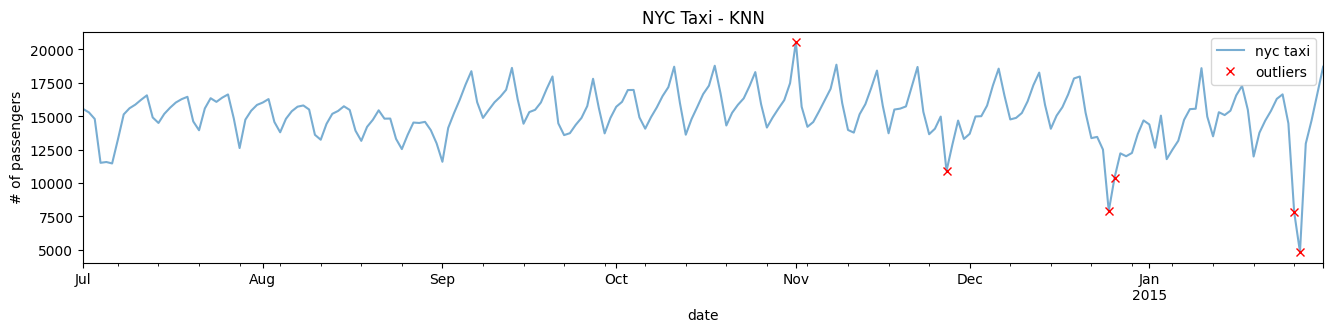

In [111]:
plot_outliers(estimated_outliers,tx)

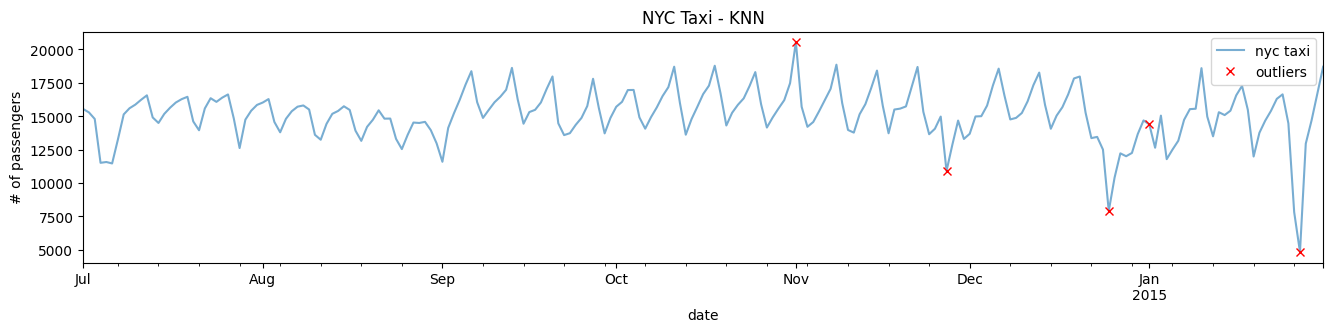

In [113]:
plot_outliers(known_outliers,tx)

In [114]:
def iqr_outliers(data, p):
    q1, q3 = np.percentile(data, [25, 75])
    IQR = q3 - q1
    lower_fence = q1 - (p * IQR)
    upper_fence = q3 + (p * IQR)
    return data[(data.value > upper_fence) | (data.value < lower_fence)]

In [120]:
estimated_outliers2=iqr_outliers(tx,1.7)
estimated_outliers2

,value
timestamp,
2014-11-01,20553.500000
2014-12-25,7902.125000
2014-12-26,10397.958333
2015-01-26,7818.979167
2015-01-27,4834.541667


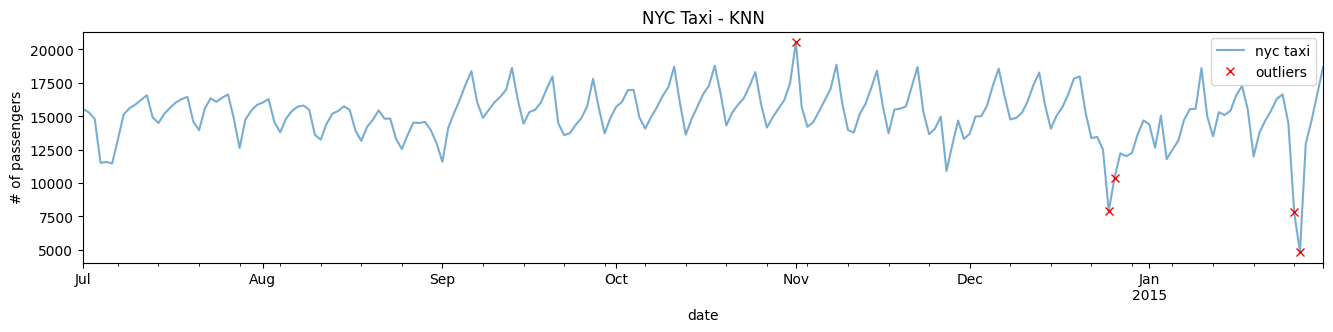

In [121]:
plot_outliers(estimated_outliers2,tx)

In [122]:
for p in [1.3, 1.5, 2.0, 2.5,  3.0]:
    print(f'with p={p}')
    print(iqr_outliers(tx, p))
    print('-'*25)

with p=1.3
                   value
timestamp               
2014-07-04  11511.770833
2014-07-05  11572.291667
2014-07-06  11464.270833
2014-09-01  11589.875000
2014-11-01  20553.500000
2014-11-08  18857.333333
2014-11-27  10899.666667
2014-12-25   7902.125000
2014-12-26  10397.958333
2015-01-26   7818.979167
2015-01-27   4834.541667
-------------------------
with p=1.5
                   value
timestamp               
2014-11-01  20553.500000
2014-11-27  10899.666667
2014-12-25   7902.125000
2014-12-26  10397.958333
2015-01-26   7818.979167
2015-01-27   4834.541667
-------------------------
with p=2.0
                   value
timestamp               
2014-11-01  20553.500000
2014-12-25   7902.125000
2015-01-26   7818.979167
2015-01-27   4834.541667
-------------------------
with p=2.5
                  value
timestamp              
2014-12-25  7902.125000
2015-01-26  7818.979167
2015-01-27  4834.541667
-------------------------
with p=3.0
                  value
timestamp             

## detecting outliers using Z score

$$
\Large z = \frac{x - \mu}{\sigma}
$$

In [126]:
def zscore(df,degree=3):
    data=df.copy()
    data['zscore'] = (data-data.mean())/data.std()
    outliers=data[(data['zscore']<= -degree) | (data['zscore']>= degree)]
    
    return outliers['value'],data
    

In [128]:
outliers,transformed = zscore(tx,2.3)
transformed

,value,zscore
timestamp,,
2014-07-01,15540.979167,0.208223
2014-07-02,15284.166667,0.075667
2014-07-03,14794.625000,-0.177014
2014-07-04,11511.770833,-1.871485
2014-07-05,11572.291667,-1.840247
...,...,...
2015-01-27,4834.541667,-5.317991
2015-01-28,12947.562500,-1.130390
2015-01-29,14686.145833,-0.233006


In [129]:
outliers

timestamp
2014-11-01    20553.500000
2014-12-25     7902.125000
2014-12-26    10397.958333
2015-01-26     7818.979167
2015-01-27     4834.541667
Name: value, dtype: float64

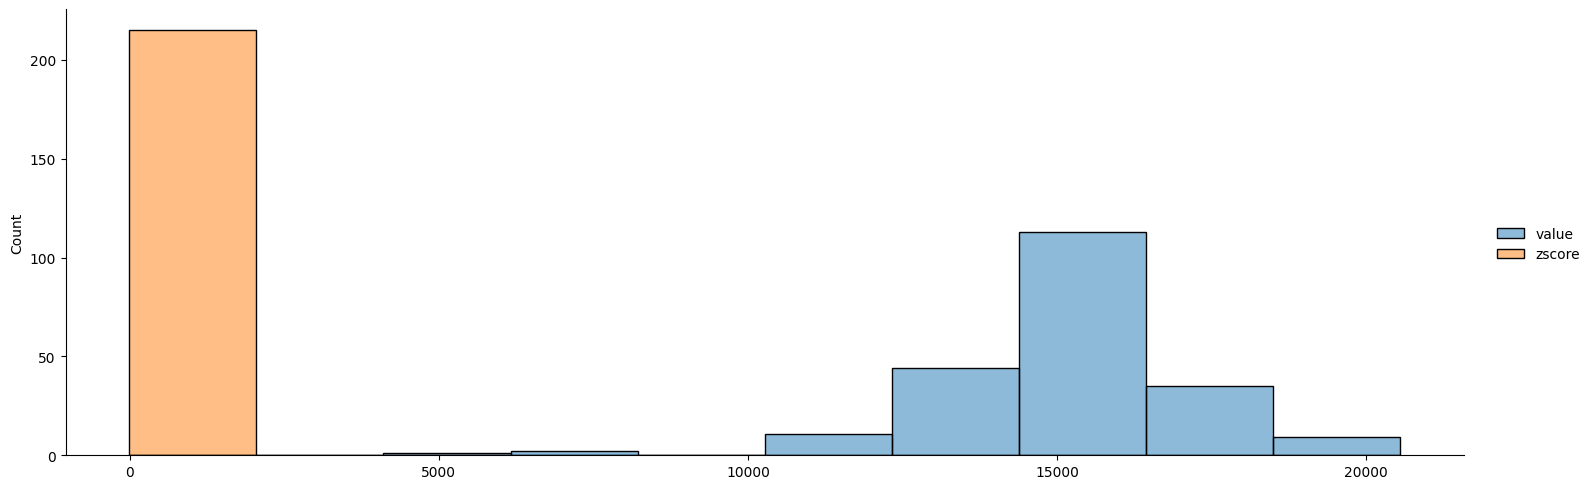

In [131]:
sns.displot(transformed , aspect=3)

array([[<Axes: title={'center': 'value'}>,
        <Axes: title={'center': 'zscore'}>]], dtype=object)

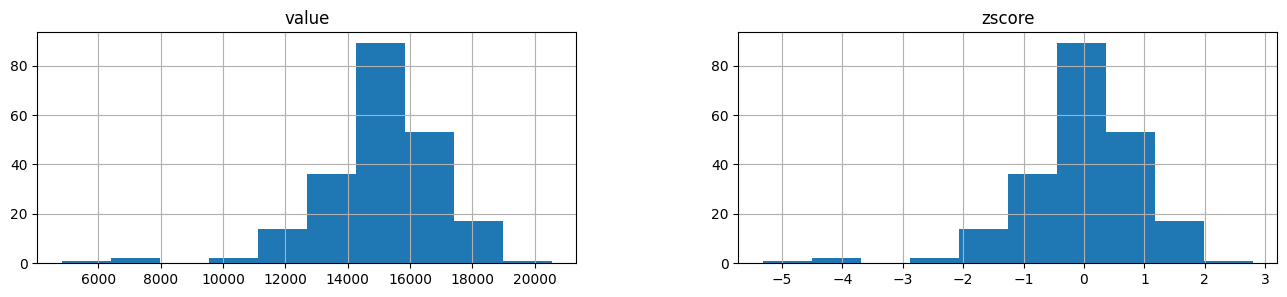

In [135]:
transformed.hist()

In [136]:
print(outliers)

timestamp
2014-11-01    20553.500000
2014-12-25     7902.125000
2014-12-26    10397.958333
2015-01-26     7818.979167
2015-01-27     4834.541667
Name: value, dtype: float64


In [137]:
def plot_zscore(data, d=3):
    n = len(data)
    plt.figure(figsize=(8,8))
    plt.plot(data,'k^')
    plt.plot([0,n],[d,d],'r--')
    plt.plot([0,n],[-d,-d],'r--')

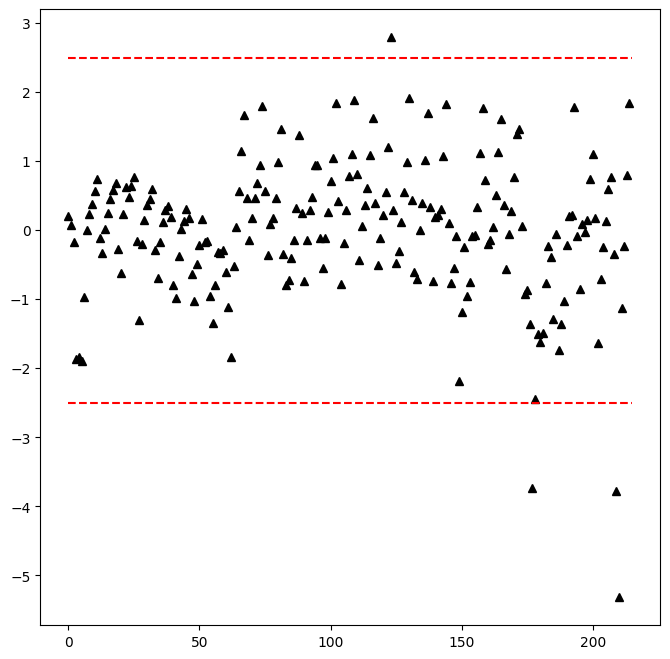

In [143]:
data = transformed.zscore.values
plot_zscore(data,d=2.5)

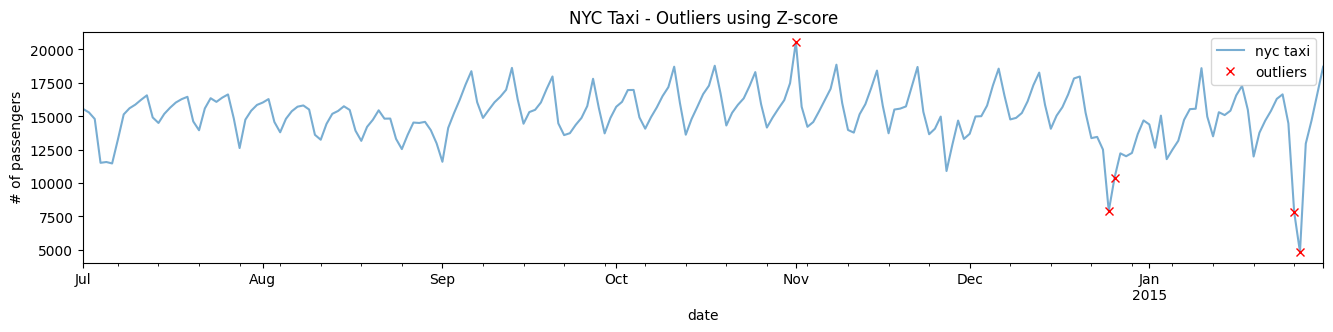

In [144]:
plot_outliers(outliers, tx, 'Outliers using Z-score')

In [147]:
from statsmodels.stats.diagnostic import kstest_normal

def test_normal(df):
    t_test, p_value = kstest_normal(df)
    print(p_value)
    if p_value < 0.05:
        print("Reject null hypothesis. Data is not normal")
    else:
        print("Fail to reject null hypothesis. Data is normal")

In [148]:
test_normal(tx)

0.0009999999999998899
Reject null hypothesis. Data is not normal
